In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Download the dataset from the URL
url = "https://raw.githubusercontent.com/jparisu/CUNEF-ML-Resources/main/datasets/imdb/imdb.csv"
df = pd.read_csv(url)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


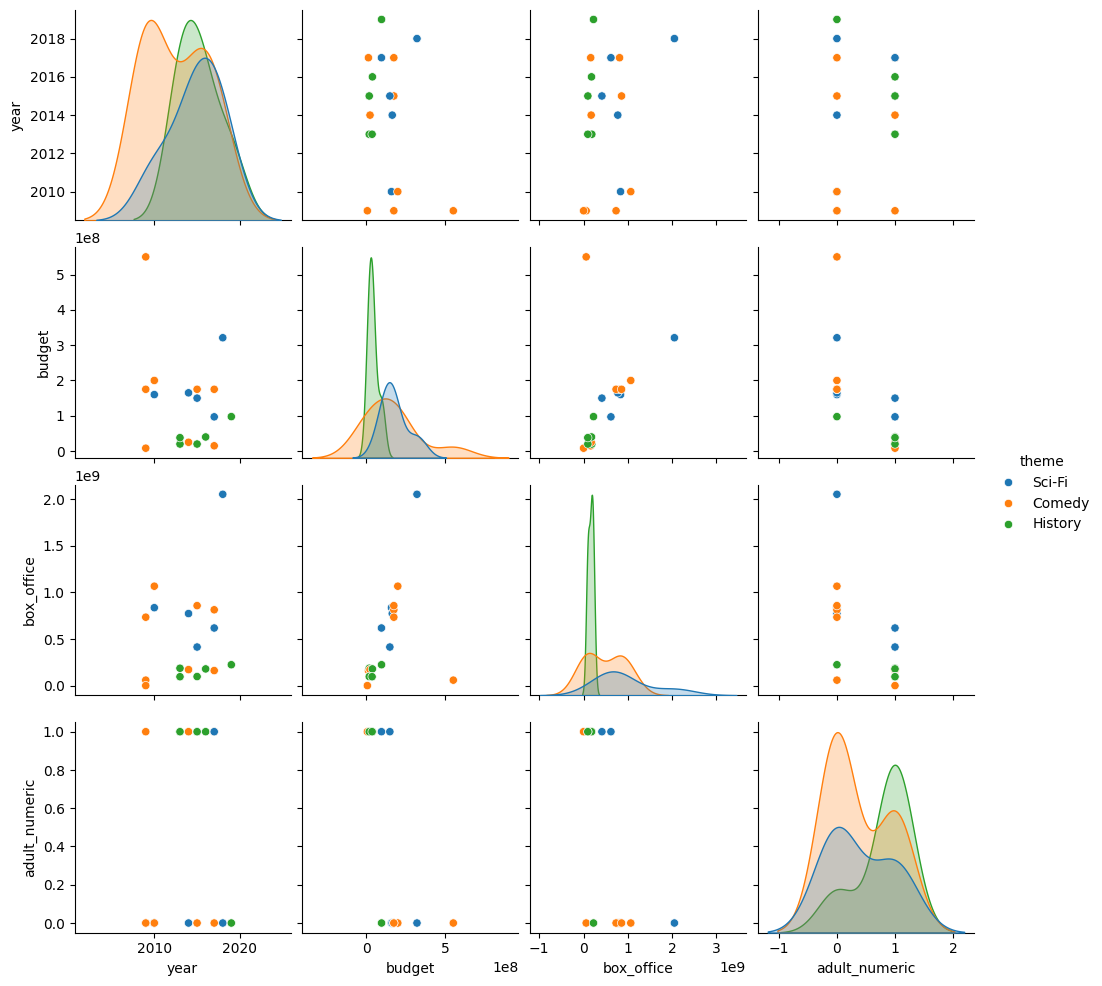

In [4]:
# Plot the data (convert the 'adult' column to numeric)
df['adult_numeric'] = df['adult'].map({'yes': 1, 'no': 0})
sns.pairplot(df, hue='theme')

<Axes: xlabel='budget', ylabel='box_office'>

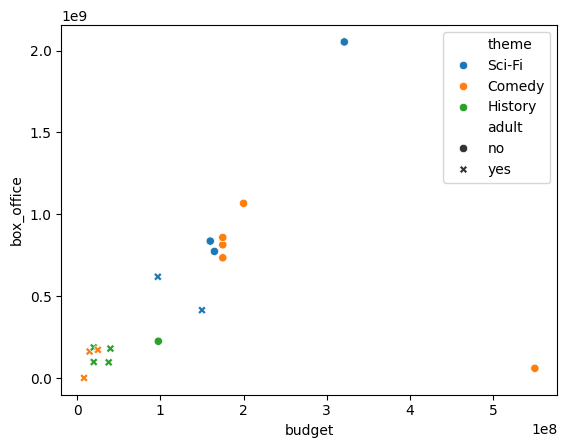

In [5]:
# Plot the whole dataset
# X axis - budget
# Y axis - box_office
# Color - theme
# Figure (o/x) - adult

sns.scatterplot(data=df, x='budget', y='box_office', hue='theme', style='adult')

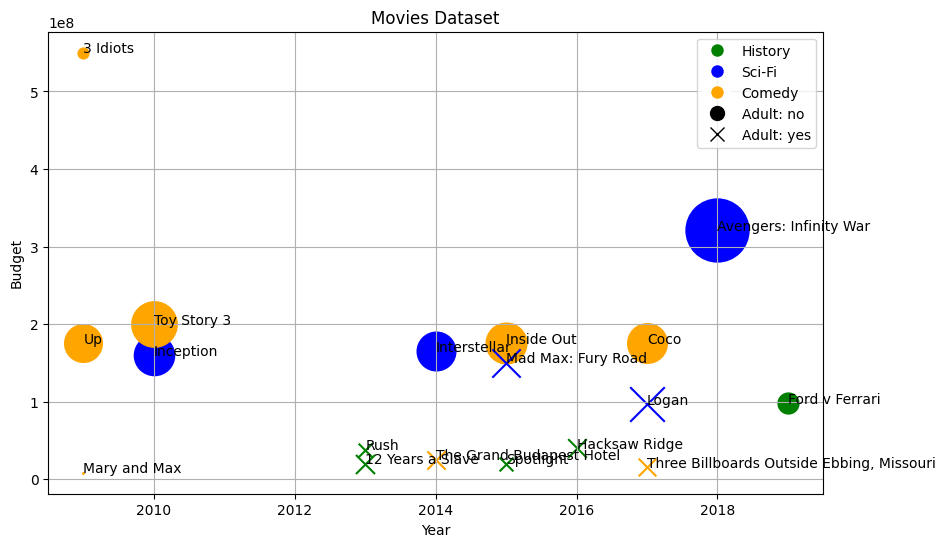

In [6]:
# Plot the whole dataset
# X axis - year
# Y axis - budget
# Color - theme
# Figure (o/x) - adult
# Size - box_office
# Add the name to each point

# Define the colors and figures
colors = {'History': 'green', 'Sci-Fi': 'blue', 'Comedy': 'orange'}
figures = {'no': 'o', 'yes': 'x'}

# Create the plot
plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    plt.scatter(row['year'], row['budget'],
                color=colors[row['theme']],
                marker=figures[row['adult']],
                s=row['box_office'] / 1000000, # Scale down the size for better visualization
                label=row['name'])
    plt.text(row['year'], row['budget'], row['name'])

# Create legend for themes
theme_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=theme)
                 for theme, color in colors.items()]

# Create legend for adult
adult_handles = [plt.Line2D([0], [0], marker=marker, color='k', linestyle='None', markersize=10, label=f'Adult: {adult}')
                 for adult, marker in figures.items()]

# Combine legends
handles = theme_handles + adult_handles
plt.legend(handles=handles)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Budget')
plt.title('Movies Dataset')
plt.grid(True)
plt.show()

<Axes: >

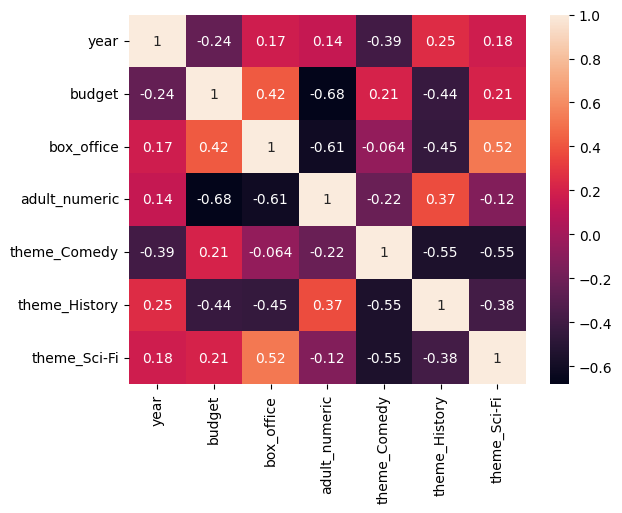

In [7]:
# Convert theme with one-hot encoding
df_num = df[['year', 'budget', 'box_office', 'adult_numeric', 'theme']]
df_num = pd.get_dummies(df_num, columns=['theme'], drop_first=False)

# See correlation matrix of numeric columns
corr = df_num.corr()
sns.heatmap(corr, annot=True)